NIM : <br>
nama : <br>
kelas :

# import library

In [662]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split


# load dataset

In [663]:
# load dataset uts
df = pd.read_csv('data_customer.csv')

df.head(20)

,Gender,Age,Income,Tenure,ServiceCalls,InternetService,PaymentMethod,LoyaltyStatus
0,Male,57,43360,8,4,DSL,Electronic check,Churn
1,Male,65,28255,11,2,Fiber optic,Credit card,Loyal
2,Male,69,88235,2,9,DSL,Mailed check,Loyal
3,Female,47,107464,9,3,DSL,Credit card,Loyal
4,Female,79,68169,6,11,No,Mailed check,Loyal
5,Female,24,20372,1,7,Fiber optic,Bank transfer,Churn
6,Male,34,73179,3,13,Fiber optic,Mailed check,Churn
7,Male,56,77649,10,2,No,Electronic check,Churn
8,Male,55,38898,5,2,DSL,Mailed check,Loyal
9,Male,22,70083,12,10,No,Mailed check,Loyal


# exploratory data analysis

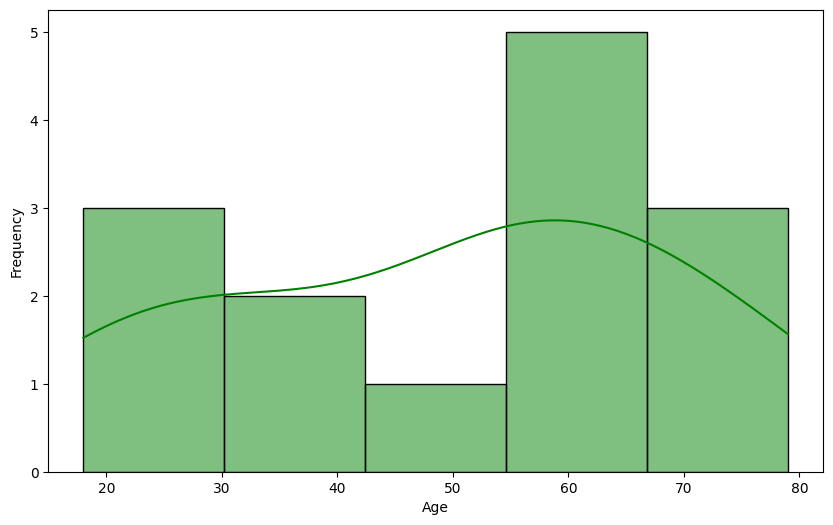

In [664]:
# eda varian 1
plt.figure(figsize=(10,6))
sns.histplot(x='Age',kde=True, color='green', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Yogi\AppData\Local\Temp\ipykernel_8336\951733661.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='LoyaltyStatus', y='Age', palette='Set2')


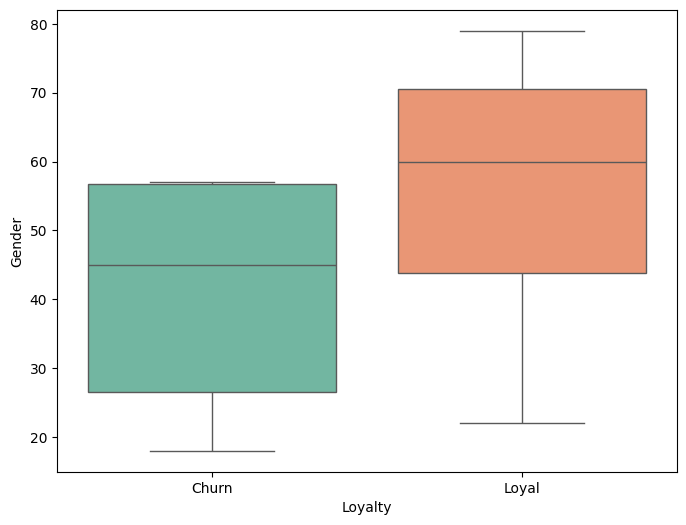

In [665]:
# eda varian 2
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='LoyaltyStatus', y='Age', palette='Set2')
plt.xlabel('Loyalty')
plt.ylabel('Gender')
plt.show()



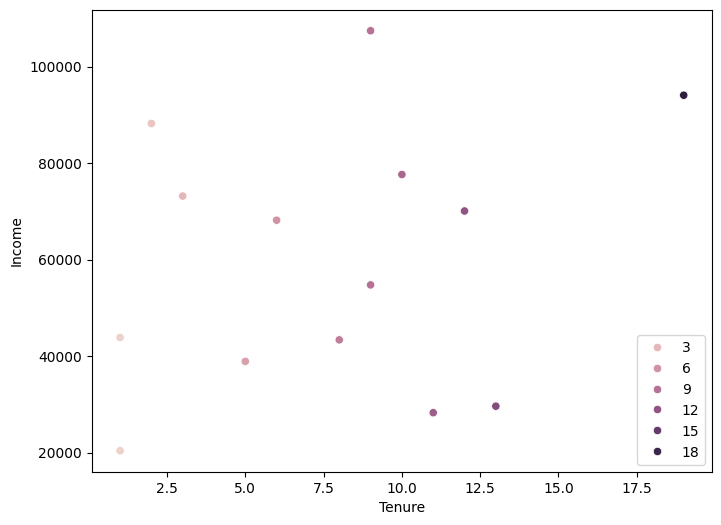

In [666]:
# eda varian 3
plt.figure(figsize=(8,6))
sns.scatterplot(x='Tenure',y='Income', data=df, hue='Tenure')
plt.legend()
plt.show()


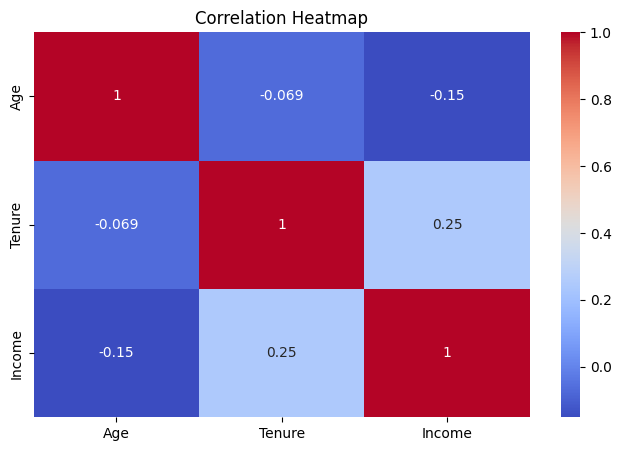

In [667]:
# eda varian 4
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age', 'Tenure', 'Income']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



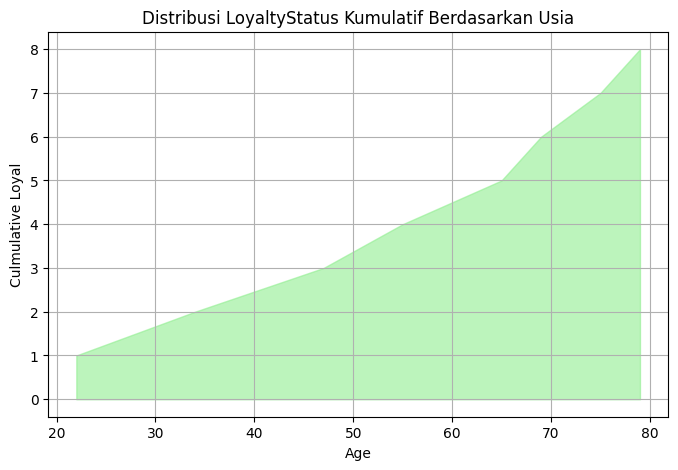

In [668]:
# eda varian 5
age_cum_cases = df[df['LoyaltyStatus']== 'Loyal'].groupby('Age').size().cumsum()
plt.figure(figsize=(8,5))
plt.fill_between(age_cum_cases.index, age_cum_cases.values, color = 'lightgreen', alpha=0.6)
plt.title("Distribusi LoyaltyStatus Kumulatif Berdasarkan Usia")
plt.xlabel("Age")
plt.ylabel("Culmulative Loyal")
plt.grid(True)
plt.show()

# data preprocessing

In [669]:
df = df.drop(columns=['ServiceCalls'])

In [670]:
df_encoded = pd.DataFrame(df) 


In [671]:
df_encoded['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [672]:
df_encoded['Gender'] = df_encoded['Gender'].map({'Male':1, 'Female': 0})
df_encoded['InternetService'] = df_encoded['InternetService'].map({'DSL':0, 'Fiber optic': 1,'No':2})
df_encoded['PaymentMethod'] = df_encoded['PaymentMethod'].map({'Electronic check': 2,'Credit card':1, 'Mailed check': 3,'Bank transfer':0})
df_encoded['LoyaltyStatus'] = df_encoded['LoyaltyStatus'].map({'Loyal': 1,'Churn':0})

In [673]:
df_encoded.head(15)

,Gender,Age,Income,Tenure,InternetService,PaymentMethod,LoyaltyStatus
0,1,57,43360,8,0,2,0
1,1,65,28255,11,1,1,1
2,1,69,88235,2,0,3,1
3,0,47,107464,9,0,1,1
4,0,79,68169,6,2,3,1
5,0,24,20372,1,1,0,0
6,1,34,73179,3,1,3,0
7,1,56,77649,10,2,2,0
8,1,55,38898,5,0,3,1
9,1,22,70083,12,2,3,1


In [674]:
Categorical_df = df_encoded.copy()
Categorical_df['Age'] = pd.cut(Categorical_df['Age'], bins=[0,30,40,50,60,80], labels=[0,1,2,3,4])
Categorical_df['Income'] = pd.cut(Categorical_df['Income'], bins=[0,20000,40000,60000,80000,200000], labels=[0,1,2,3,4])
Categorical_df['Tenure'] = pd.cut(Categorical_df['Tenure'], bins=[0,5,10,15,20], labels=[0,1,2,3])


In [675]:
Categorical_df.head(13)

,Gender,Age,Income,Tenure,InternetService,PaymentMethod,LoyaltyStatus
0,1,3,2,1,0,2,0
1,1,4,1,2,1,1,1
2,1,4,4,0,0,3,1
3,0,2,4,1,0,1,1
4,0,4,3,1,2,3,1
5,0,0,1,0,1,0,0
6,1,1,3,0,1,3,0
7,1,3,3,1,2,2,0
8,1,3,1,0,0,3,1
9,1,0,3,2,2,3,1


# modeling

In [676]:
X_categorical = Categorical_df[['Tenure','Gender','Age', 'Income', 'InternetService', 'PaymentMethod']]
y_categorical = Categorical_df['LoyaltyStatus']

In [677]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_categorical, y_categorical, test_size=0.3, random_state=42)


In [678]:
cat_nb_model = CategoricalNB()
cat_nb_model.fit(X_train_cat, y_train_cat)

CategoricalNB()

In [679]:
y_pred_cat = cat_nb_model.predict(X_test_cat)

# simulasi

In [680]:

new_data_categorical = np.array([[1,0, 2, 1, 2,1]]) 
new_prediction_cat = cat_nb_model.predict(new_data_categorical)


c:\Users\Yogi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [681]:
(new_prediction_cat)


array([1], dtype=int64)

In [682]:
if (new_prediction_cat[0]==0):
    print ('Churn')
else:
    print('Loyal')   

Loyal


In [683]:
cat_accuracy = accuracy_score(y_test_cat, y_pred_cat)

In [684]:
cat_conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)

In [685]:
(cat_accuracy, cat_conf_matrix)

(0.4,
 array([[1, 2],
        [1, 1]], dtype=int64))